In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset from kaggle
data = pd.read_csv("Largest_Companies.csv")

In [3]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [4]:
# checking the data type
data.dtypes

Rank                       int64
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object

In [5]:
# Converting column to appropriate data type
data['Revenue (USD millions)'] = data['Revenue (USD millions)'].str.replace(',','').astype('int')

In [6]:
data['Revenue growth'] = data['Revenue growth'].str.replace('%','').astype('float')

In [7]:
data['Employees'] = data['Employees'].str.replace(',','').str.replace(' ','').astype('int64')

In [8]:
data.dtypes

Rank                        int64
Name                       object
Industry                   object
Revenue (USD millions)      int64
Revenue growth            float64
Employees                   int64
Headquarters               object
dtype: object

In [9]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [10]:
# checking for missing values
data.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

Looking for the top 10 industries

In [11]:
industries = data['Industry'].value_counts().head(10)

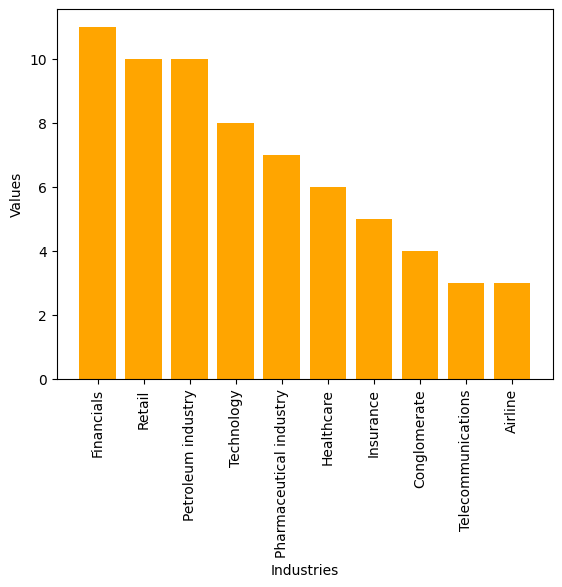

In [12]:
# Bar chart of top 10 industries
plt.bar(industries.index,industries.values, color ='orange')
plt.xticks(industries.index, rotation ='vertical', size = 10)
plt.xlabel('Industries')
plt.ylabel('Values')
plt.show()

In [13]:
# Pie chart for the distribution of industries
count = data['Industry'].value_counts()

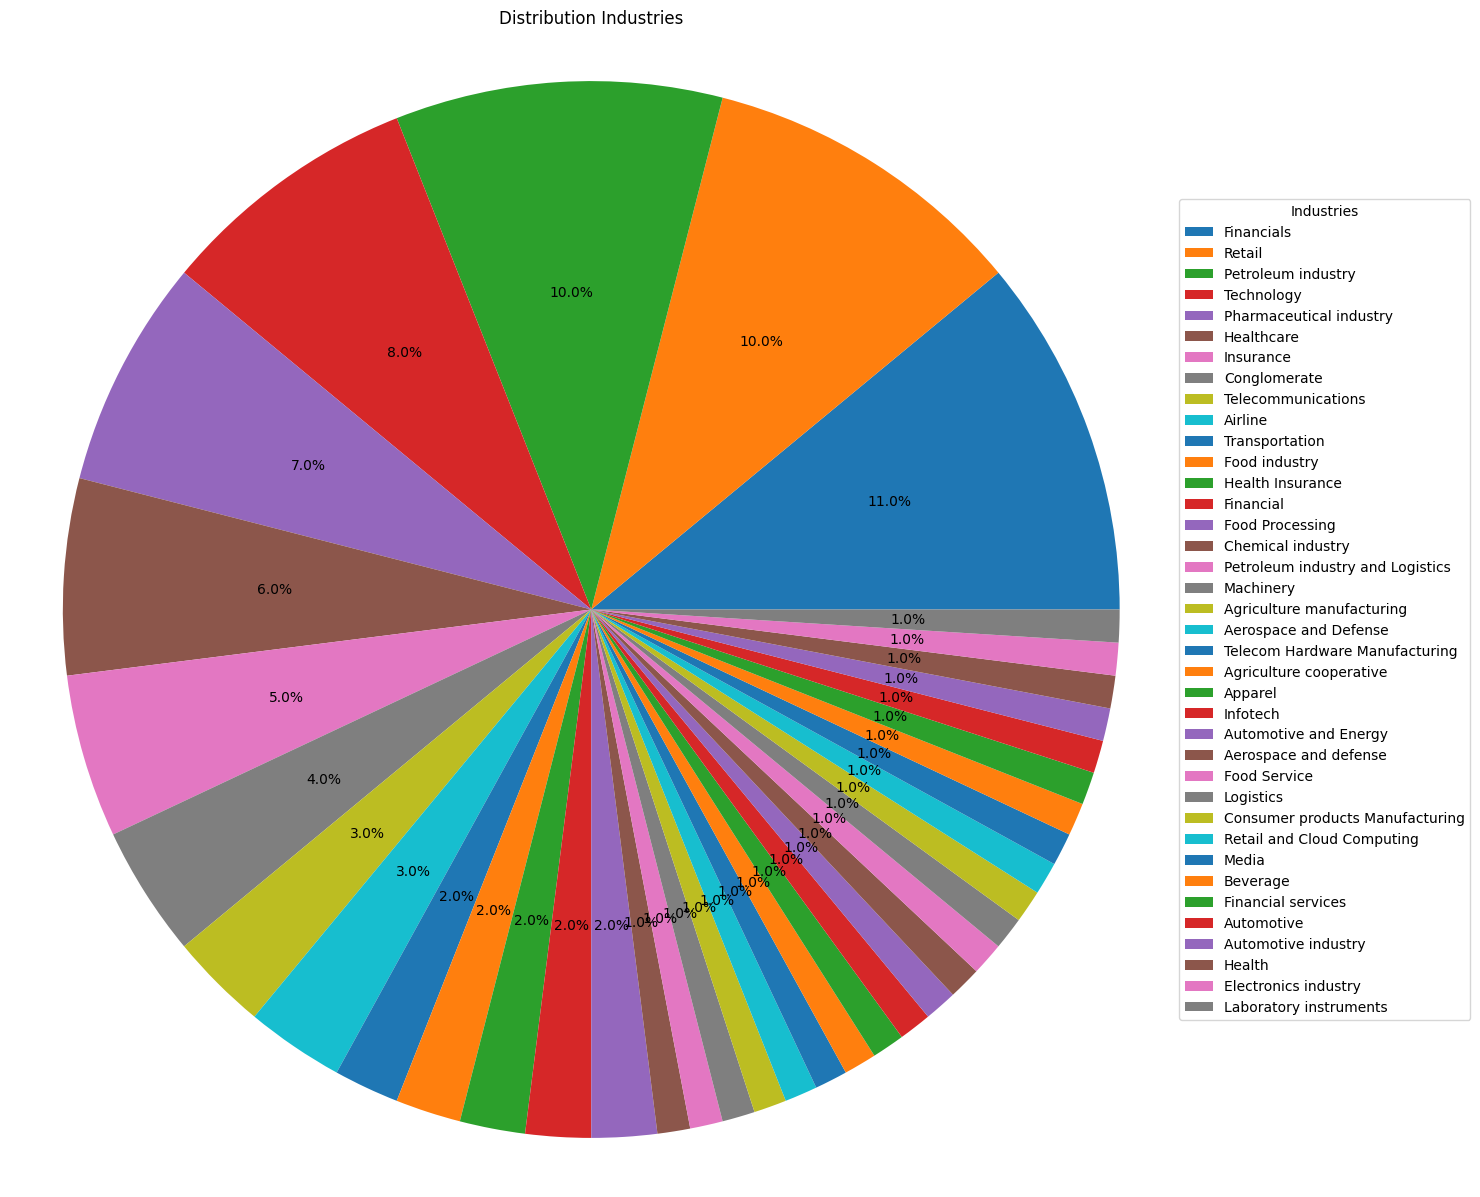

In [14]:
plt.figure(figsize = (15,15))
plt.pie(count, labels = None, autopct= '%1.1f%%')
plt.legend(count.index, title = 'Industries', loc ='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution Industries')
plt.axis('equal')
plt.show()

In [15]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [16]:
# Count of companies by state
data['Headquarters_state'] = data['Headquarters'].apply(lambda x: x.split(',')[-1])

In [17]:
state_count = data['Headquarters_state'].value_counts()

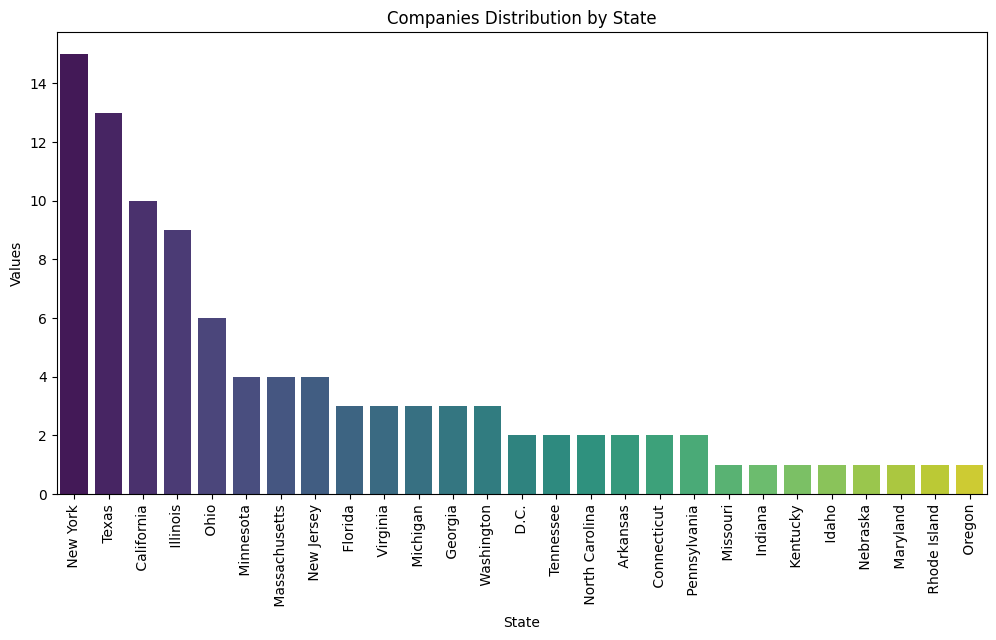

In [18]:
# Plotting the distribution of companies by state
plt.figure(figsize= (12,6))
sns.barplot(x = state_count.index, y = state_count.values, palette = 'viridis')
plt.xticks( rotation = 90)
plt.xlabel('State')
plt.ylabel('Values')
plt.title('Companies Distribution by State')
plt.show()

In [19]:
# Creating a new headquters_city column from the headquarters column
data['headquaters_city'] = data['Headquarters'].apply(lambda x: x.split(',')[0])

In [20]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarters_state,headquaters_city
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Arkansas,Bentonville
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington",Washington,Seattle
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Texas,Spring
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",California,Cupertino
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnesota,Minnetonka


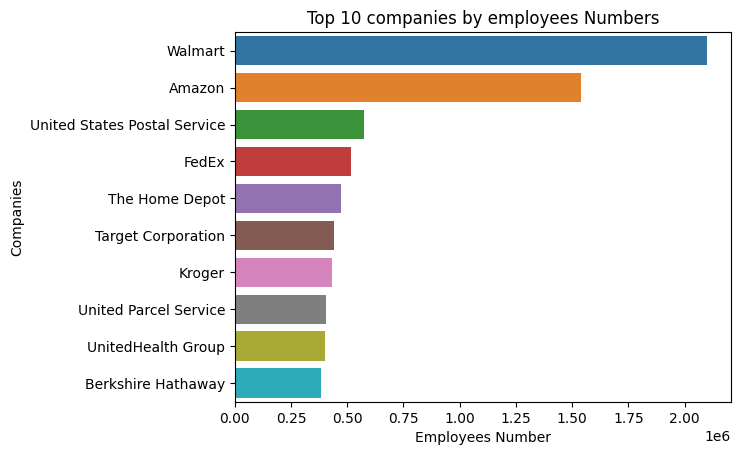

In [21]:
# Bar plot of the top 10 companies by employees
employee = data.nlargest(10, 'Employees')
sns.barplot(x = 'Employees', y =  'Name', data = employee)
plt.xlabel('Employees Number')
plt.ylabel('Companies')
plt.title('Top 10 companies by employees Numbers')
plt.show()

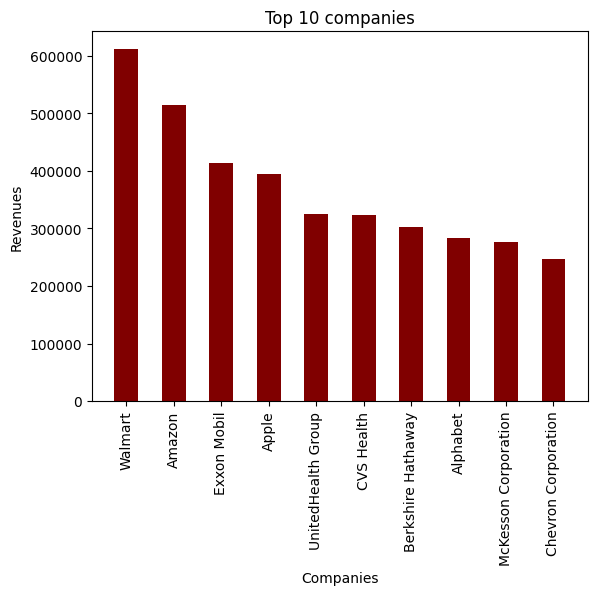

In [22]:
# Top 10 Companies
top_10 = data.sort_values(by = ['Revenue (USD millions)'], ascending= False).head(10)
plt.bar(x = top_10['Name'], height = top_10['Revenue (USD millions)'], width= 0.5, color = 'maroon')
plt.xticks(top_10['Name'], rotation = "vertical")
plt.xlabel('Companies')
plt.ylabel('Revenues')
plt.title('Top 10 companies')
plt.show()

Industry Analysis

Industry Analysis: Examine the distribution of company revenues ("Revenue (USD millions)") to identify the range and distribution of revenue figures among the companies.

In [23]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarters_state,headquaters_city
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Arkansas,Bentonville
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington",Washington,Seattle
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Texas,Spring
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",California,Cupertino
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnesota,Minnetonka


In [24]:
# Count the number of companies per industry
industry = data['Industry'].value_counts()

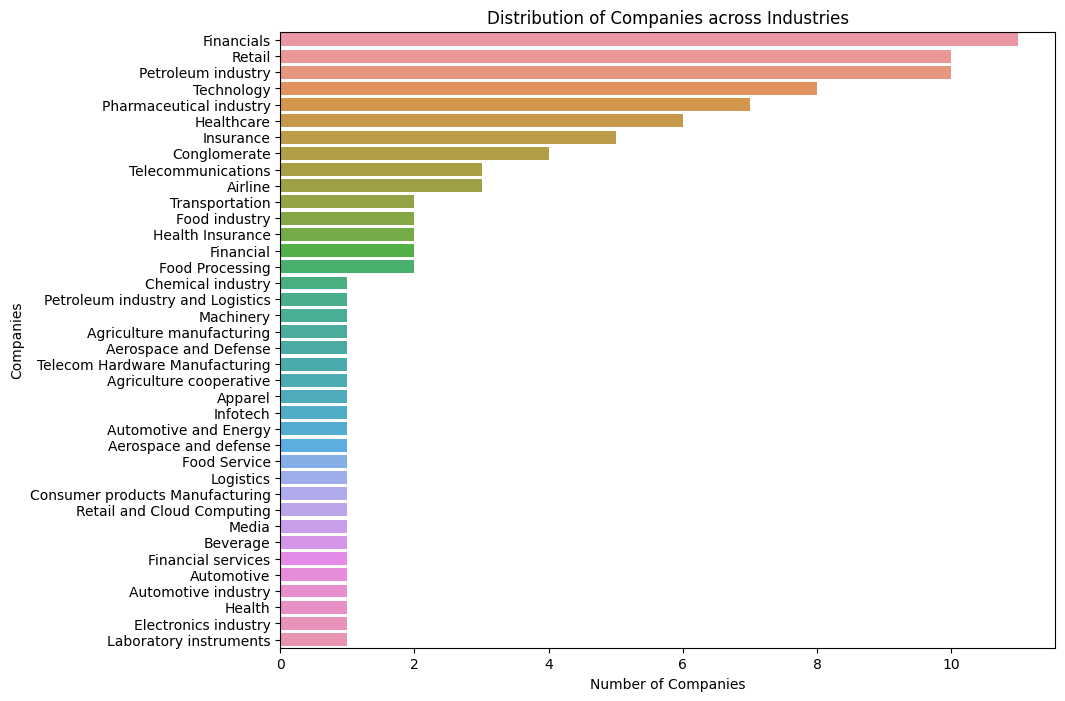

In [25]:
# Creating a bar plot to visualize the distribution
plt.figure(figsize=(10,8))
sns.barplot(x = industry.values, y= industry.index)
plt.xlabel('Number of Companies')
plt.ylabel('Companies')
plt.title('Distribution of Companies across Industries')
plt.show()

Revenue Growth trends

In [26]:
# Sorting the data by revenue growth
data_growth = data.sort_values(by = ['Revenue growth'], ascending = False).head(20).copy()
data_growth

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarters_state,headquaters_city
65,66,TD Synnex,Infotech,62344,97.2,28500,"Clearwater, Florida",Florida,Clearwater
71,72,World Fuel Services,Petroleum industry and Logistics,59043,88.4,5214,"Miami, Florida",Florida,Miami
97,98,United Airlines,Airline,44955,82.5,92795,"Chicago, Illinois",Illinois,Chicago
93,94,PBF Energy,Petroleum industry,46830,71.8,3616,"Parsippany–Troy Hills, New Jersey",New Jersey,Parsippany–Troy Hills
48,49,ConocoPhillips,Petroleum industry,82156,69.9,9500,"Houston, Texas",Texas,Houston
86,87,Delta Air Lines,Airline,50582,69.2,95000,"Atlanta, Georgia",Georgia,Atlanta
90,91,American Airlines,Airline,48971,63.9,129700,"Fort Worth, Texas",Texas,Fort Worth
92,93,Performance Food Group,Food Processing,47194,61.6,34825,"Richmond, Virginia",Virginia,Richmond
17,18,Valero Energy,Petroleum industry,171189,58.0,9743,"San Antonio, Texas",Texas,San Antonio
60,61,StoneX Group,Financials,66036,55.3,305,"New York City, New York",New York,New York City


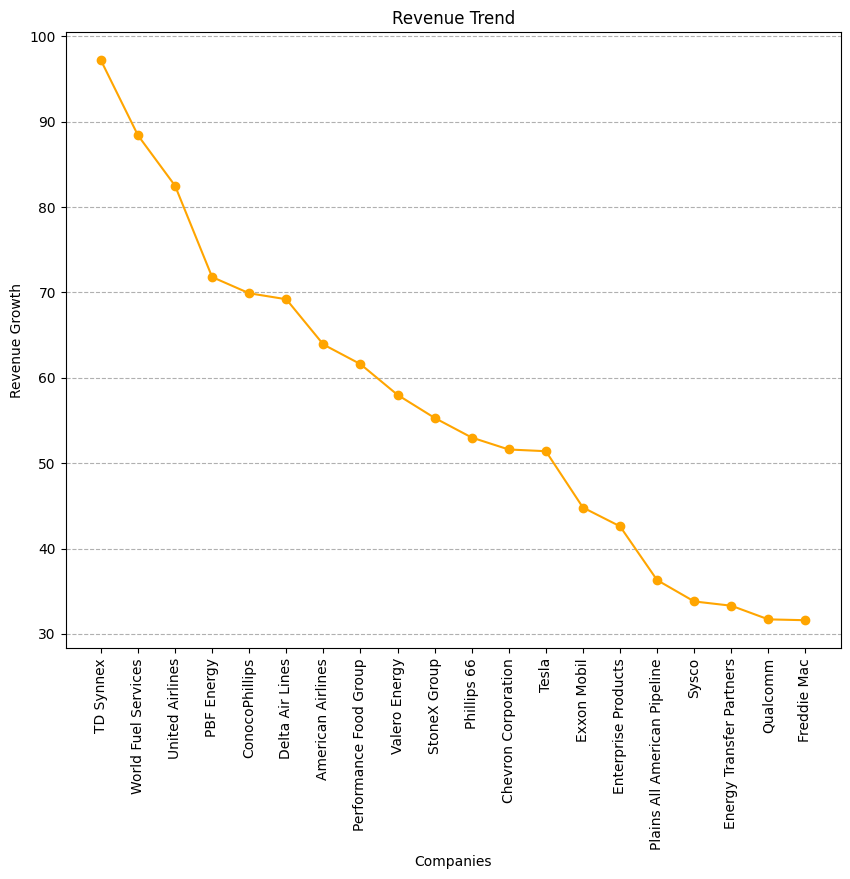

In [27]:
plt.figure(figsize = (10,8))
plt.plot(data_growth['Name'], data_growth['Revenue growth'], marker = 'o', linestyle = '-', color = 'orange')
plt.xticks(rotation = 'vertical')
plt.xlabel('Companies')
plt.ylabel('Revenue Growth')
plt.title('Revenue Trend')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

Industry Revenue Comparison

In [28]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarters_state,headquaters_city
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Arkansas,Bentonville
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington",Washington,Seattle
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Texas,Spring
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",California,Cupertino
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnesota,Minnetonka


In [29]:
# Group by industry and calculate the average Revenue for each Industry
average_revenue = data.groupby('Industry')['Revenue (USD millions)'].mean().reset_index()
average_revenue.head()

,Industry,Revenue (USD millions)
0,Aerospace and Defense,65984.000000
1,Aerospace and defense,66608.000000
2,Agriculture cooperative,47194.000000
3,Agriculture manufacturing,52577.000000
4,Airline,48169.333333


In [30]:
average_revenue = average_revenue.sort_values(by = ['Revenue (USD millions)'], ascending= False)
average_revenue.head()

,Industry,Revenue (USD millions)
33,Retail and Cloud Computing,513983.0
13,Electronics industry,394328.0
20,Health,276711.0
22,Healthcare,198228.0
8,Automotive industry,158057.0


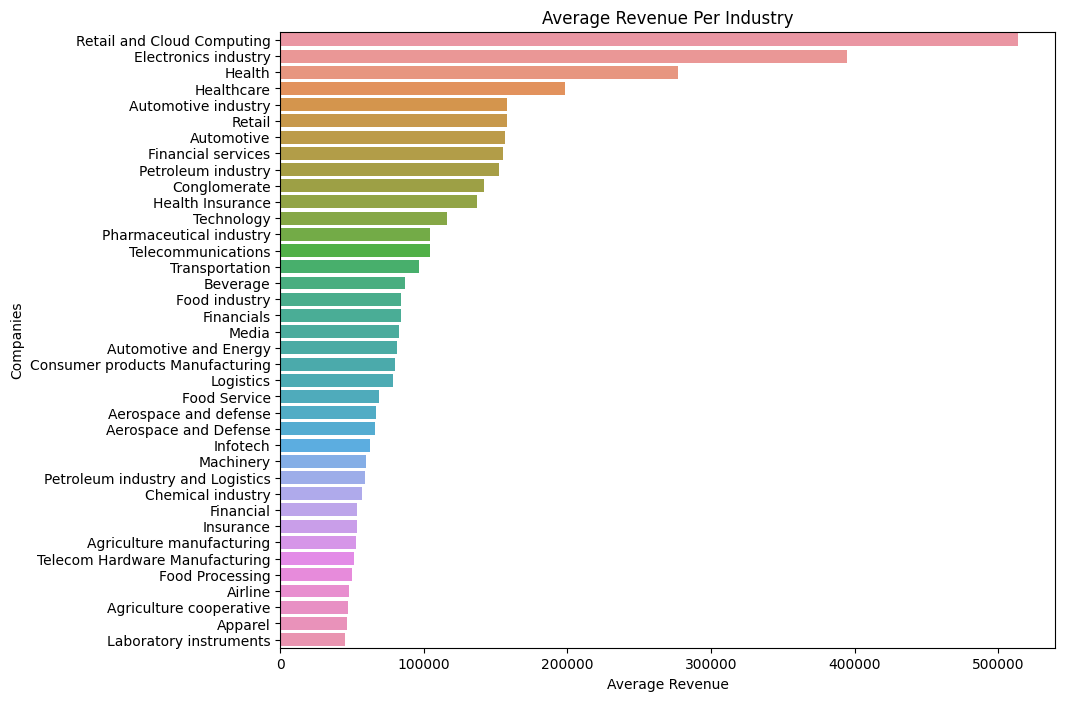

In [31]:
# Creating a bar plot to visualize the average revenue
plt.figure(figsize = (10,8))
sns.barplot( x = average_revenue['Revenue (USD millions)'], y = average_revenue['Industry'])
plt.xlabel('Average Revenue')
plt.ylabel('Companies')
plt.title('Average Revenue Per Industry')
plt.show()

Correlation Analysis

In [32]:
# Finding the correlation between revenue and employees
correlation = data[['Revenue (USD millions)', 'Employees']]
correlation.head()

,Revenue (USD millions),Employees
0,611289,2100000
1,513983,1540000
2,413680,62000
3,394328,164000
4,324162,400000


In [33]:
# Calculating the Correlation
corr_matrix = correlation.corr()

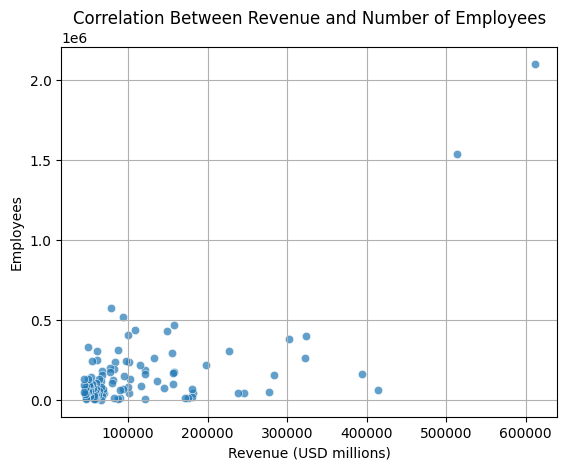

In [34]:
sns.scatterplot(data = correlation, x = 'Revenue (USD millions)', y = 'Employees' , alpha = 0.7)
plt.title('Correlation Between Revenue and Number of Employees')
plt.grid(True)
plt.show()

Regional Revenue Trends

In [35]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarters_state,headquaters_city
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Arkansas,Bentonville
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington",Washington,Seattle
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Texas,Spring
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",California,Cupertino
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnesota,Minnetonka


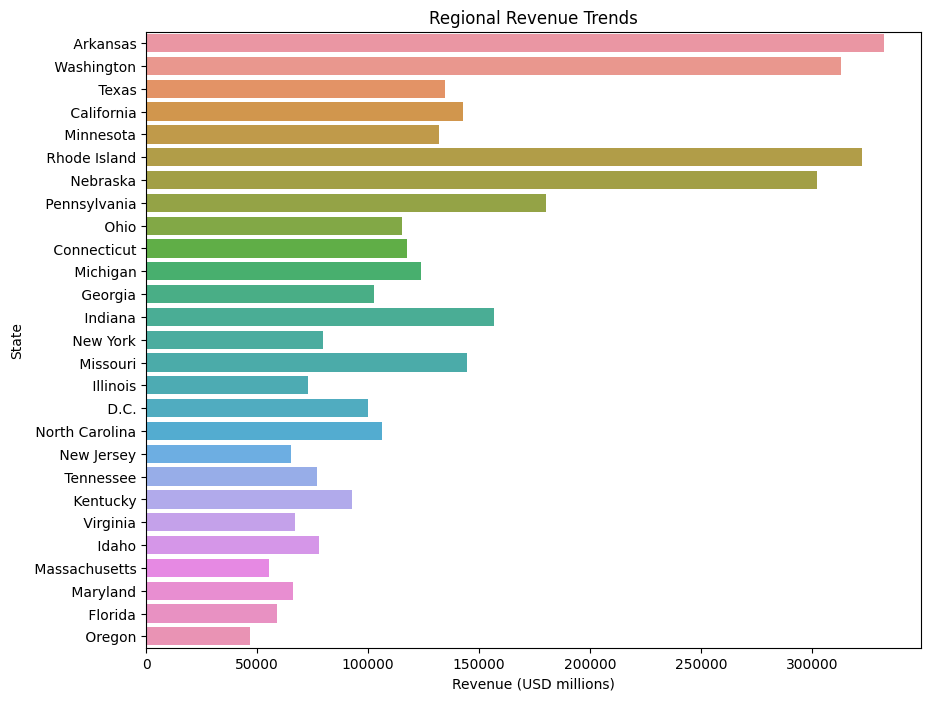

In [36]:
# Making the visualization
plt.figure(figsize= (10,8))
sns.barplot(data = data, x = 'Revenue (USD millions)', y = 'Headquarters_state', errorbar = None)
plt.xlabel('Revenue (USD millions)')
plt.ylabel('State')
plt.title('Regional Revenue Trends')
plt.show()

Box Plot for Revenue

In [37]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarters_state,headquaters_city
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Arkansas,Bentonville
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington",Washington,Seattle
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Texas,Spring
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",California,Cupertino
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnesota,Minnetonka


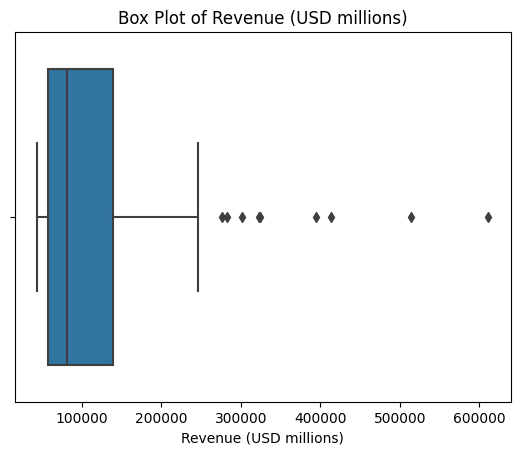

In [38]:
sns.boxplot( data = data, x = 'Revenue (USD millions)')
plt.title('Box Plot of Revenue (USD millions)')
plt.show()

Box Plot per Revenue Gowth

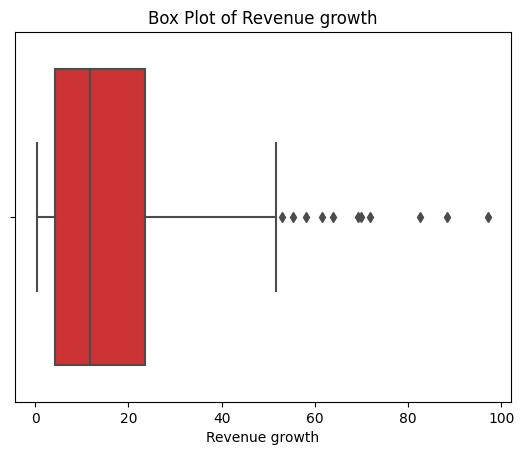

In [39]:
sns.boxplot( data = data, x = 'Revenue growth', palette = 'Set1')
plt.title('Box Plot of Revenue growth')
plt.show()

Box Plot for employees

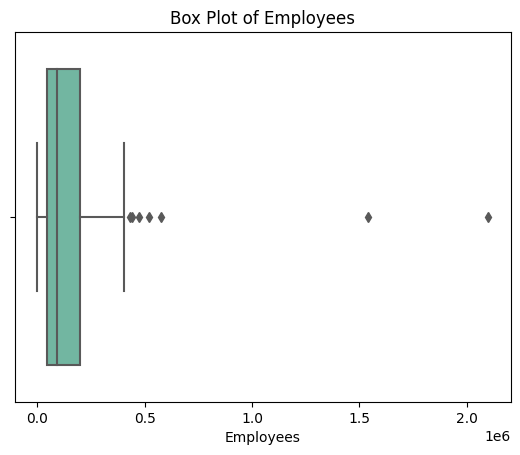

In [40]:
sns.boxplot( data = data, x = 'Employees', palette = 'Set2')
plt.title('Box Plot of Employees')
plt.show()